In [1]:
# importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle



In [ ]:
# read the input csv file and convert into a pandas dataframe
df = pd.read_csv('C:/Users/spand/DataScienceTransition/churn-prediction/Churn_Prediction_Code/data/raw/Customer_Churn.csv')

df.head()  # display the sample records

In [ ]:
print(df.info())  # check the complete details of the dataframe


In [ ]:
print(df.describe())  # check the five point summary of the data

In [8]:
# from the dataset the datatype of the total charges is object type instead of numeric.
#convert the datatype to numeric and handle the missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df.median(numeric_only=True), inplace=True)

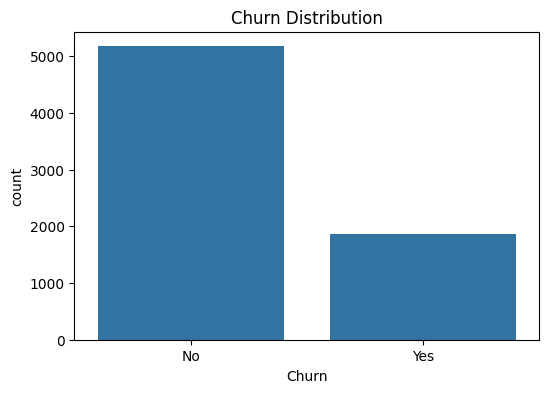

In [5]:
#visual analysis of categorical variables

#target variable
plt.figure(figsize=(6,4))
sns.countplot(x = 'Churn' , data = df)
plt.title('Churn Distribution')
plt.show()

Dataset is imbalanced. ~26–30% customers churn.

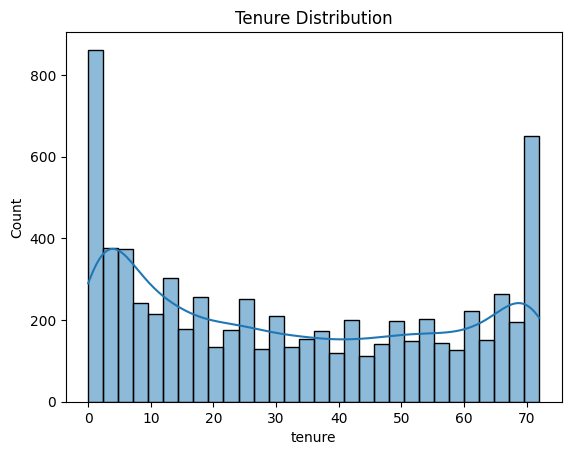

In [6]:
#numerical data analysis for Tenure

plt.Figure(figsize = (15,6))
sns.histplot(df['tenure'],bins=30,kde = True)
plt.title('Tenure Distribution')
plt.show()

most of the customers are new. 

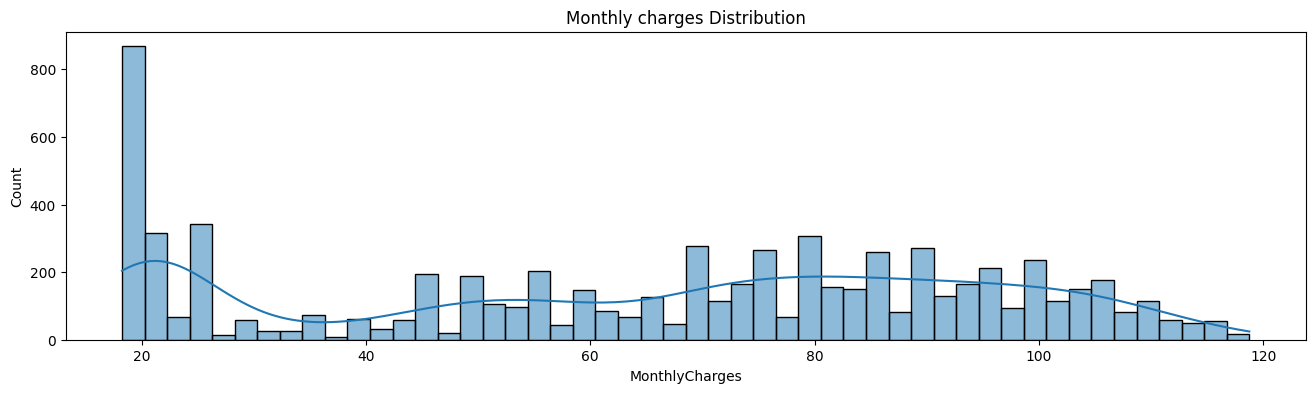

In [7]:
#monthly charges distribution

plt.figure(figsize = (16,4))
sns.histplot(df['MonthlyCharges'],bins = 50 ,kde = True)
plt.title('Monthly charges Distribution')
plt.show()

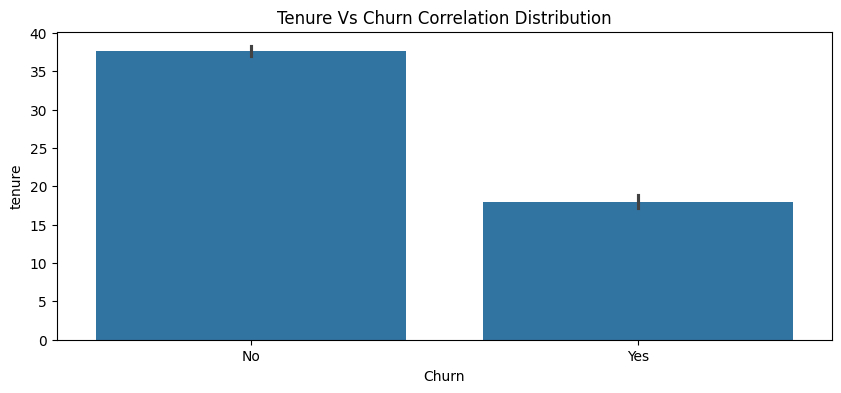

In [11]:
#Bivariate analysis

# Tenure Vs Churn

plt.figure(figsize=(10,4))
sns.barplot(x = 'Churn',y = 'tenure',data = df)
plt.title('Tenure Vs Churn Correlation Distribution')
plt.show()

customers within the lower tenure range are likely to churn more

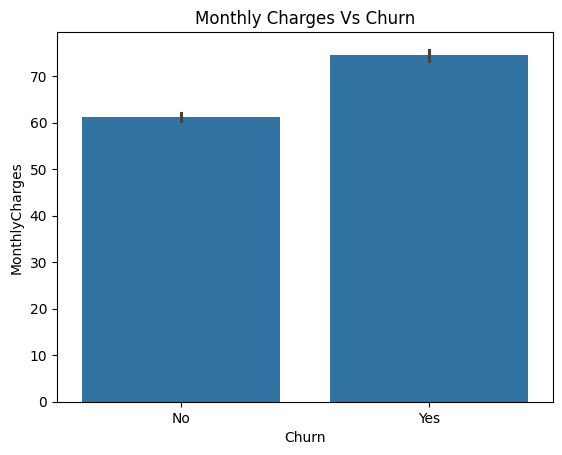

In [14]:
#Monthly Charges Vs Churn

plt.Figure(figsize=(6,4))
sns.barplot(x = 'Churn', y ='MonthlyCharges', data =  df)
plt.title('Monthly Charges Vs Churn')
plt.show()

customers churned paid more monthly charges

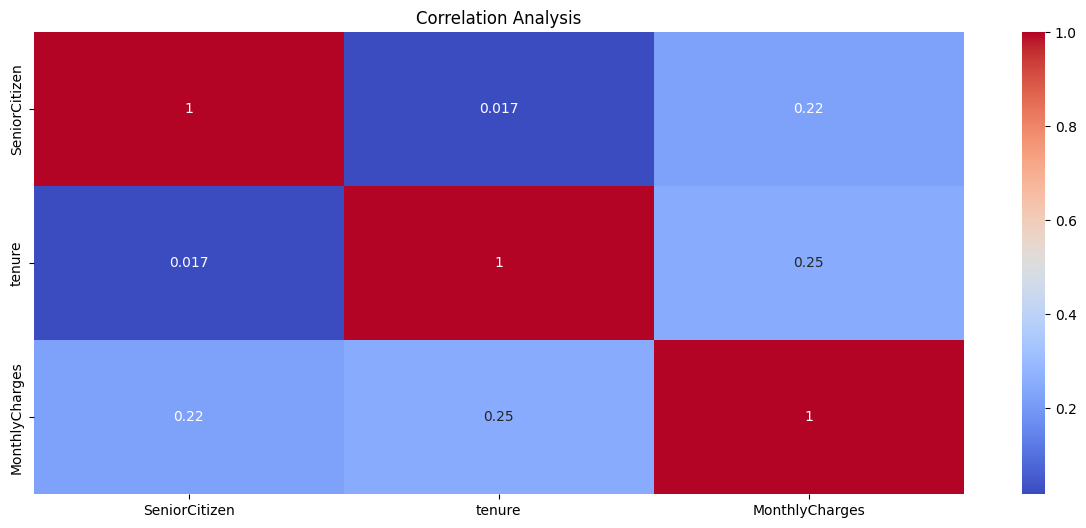

In [15]:
# heatmap distribution- correlation analysis

plt.figure(figsize=(15,6))
corr = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, annot= True , cmap= 'coolwarm')
plt.title('Correlation Analysis')
plt.show()



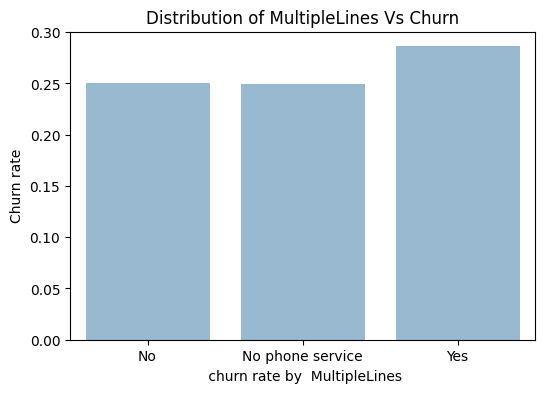

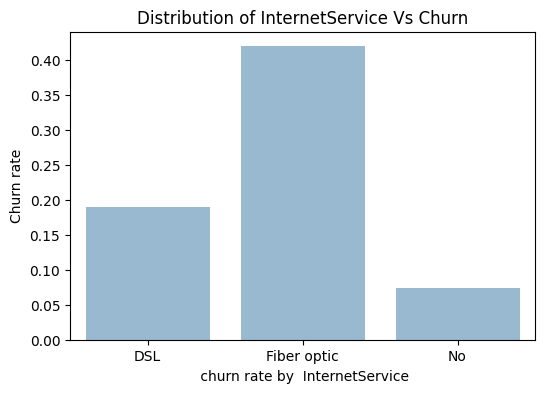

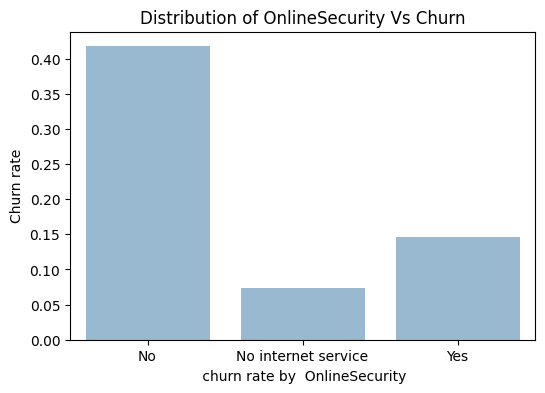

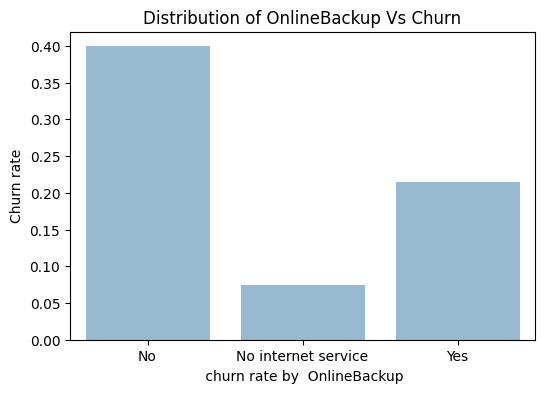

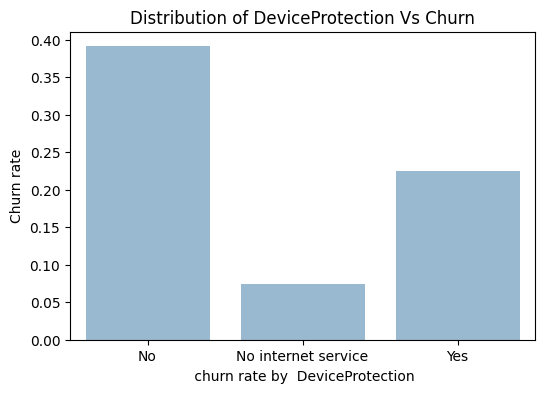

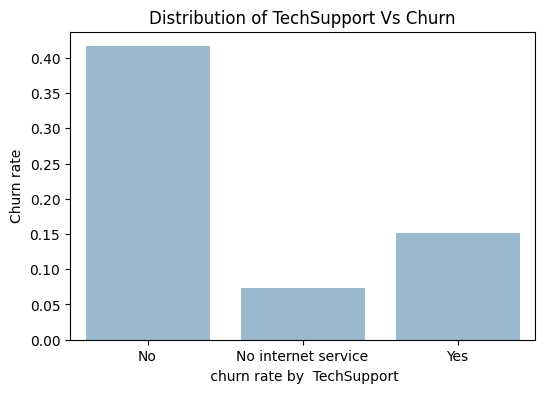

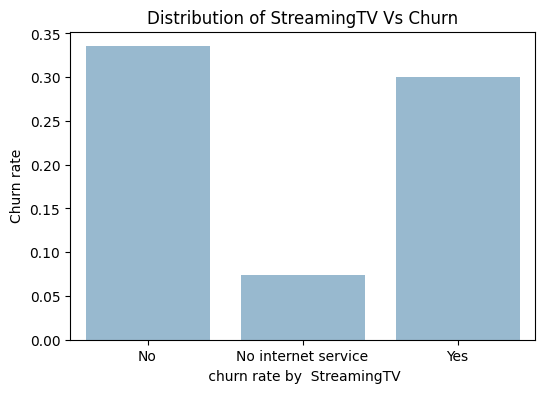

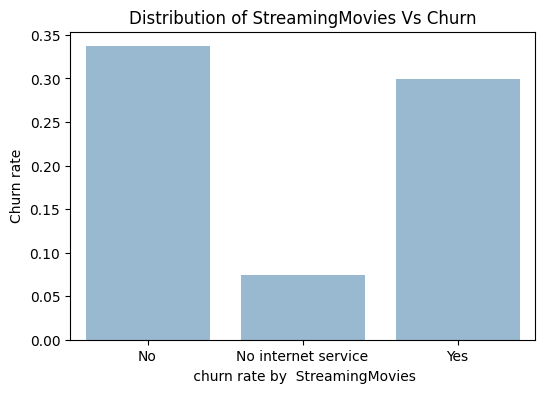

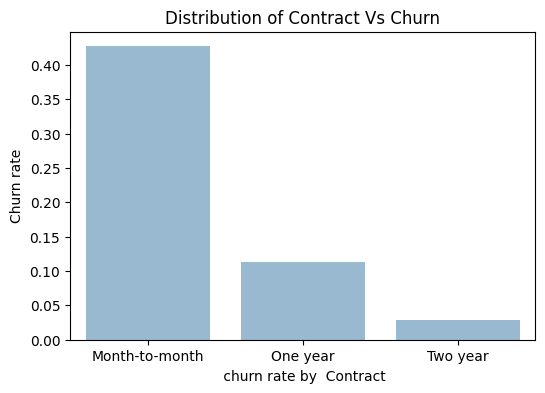

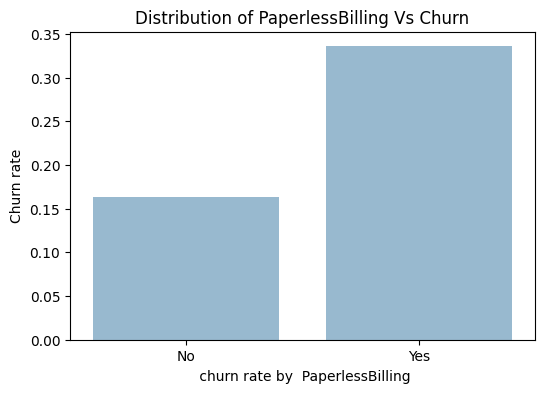

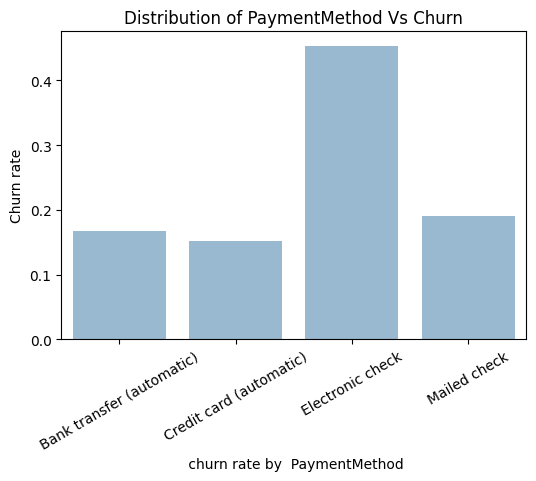

In [30]:
# analysing the categorical columns against target variable
cols = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection"
      ,"TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]
df['churn_flag']= df['Churn'].map({'Yes':1 , 'No':0})

for col in cols:
    plt.figure(figsize=(6,4))
    churn_rate = df.groupby(col)['churn_flag'].mean().reset_index()
    sns.barplot(x = col, y = 'churn_flag', data = churn_rate , alpha = 0.5 )
    plt.title(f"Distribution of {col} Vs Churn")
    plt.xlabel(f" churn rate by  {col}")
    plt.ylabel("Churn rate")
    if col == 'PaymentMethod':
      plt.xticks(rotation = 30)
    plt.show() 
   

Contracts Vs Churn:
Month-to-month customers have the highest churn rate
Long-term contracts significantly reduce churn risk

Payment Method Vs Churn:
Electronic check users churn more
Auto-payment methods increase retention

Internet Service Vs Churn:
Fiber optic customers show higher churn
Indicates pricing or service-quality concerns

Tech Support vs Churn:
Customers without tech support churn significantly more
Upselling tech support may reduce churn

Online Security Vs Churn:
Security add-ons correlate with lower churn
Value-added services improve retention



In [31]:
# converting the categorical variables into numeric using labelencoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [32]:
# split the dataset into X and Y train and test variables

X =  df.drop('Churn',axis = 1)
y = df['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.7 , random_state = 42)

In [33]:
#designing the model

rfc = RandomForestClassifier(n_estimators = 300
, max_depth = 10
, random_state = 42)

print(rfc)


RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)


In [34]:
#training the model
rfc.fit(X_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [ ]:
y_pred = rfc.predict(X_test)  # prediction

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3601
           1       0.69      0.48      0.56      1330

    accuracy                           0.80      4931
   macro avg       0.76      0.70      0.72      4931
weighted avg       0.79      0.80      0.79      4931

